
# Análisis y visualización de datos de eventos de violencia de género en la ciudad de Villavicencio, Meta.
---

Este proyecto se realizó siguiendo la metodología del curso, en este caso: la metodología ***CRISP-DM (Cross Industry Standard for Data Mining)*** 

<img src = "https://img.freepik.com/vector-gratis/concepto-identidad-genero_23-2148539311.jpg?t=st=1647399476~exp=1647400076~hmac=78fb6b25a0a1c19a0d921916a5f8cc1631502911d6627dea8bc29f50b73b1ec4&w=1380" alt = "Igualdad de género" width = "20%">  </img>

  **Desarrollado por:** Maira Alejandra Pérez Mondragón
  
  **Correo electrónico:** mamondragon@unal.edu.co




In [197]:
import pandas as pd
import numpy as np
from scipy import stats
import scipy
import seaborn as sns
import matplotlib  
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
!python --version
print('Pandas', pd.__version__)
print('NumPy', np.__version__)
print('SciPy', scipy.__version__)

Python 3.7.12
Pandas 1.3.5
NumPy 1.21.5
SciPy 1.4.1


Este notebook fue realizado con las siguientes versiones:

- *Python* 3.7.12
- *Pandas* 1.3.5
- *NumPy* 1.21.5
- *SciPy* 1.4.1

## **1. Entendimiento del negocio**
---

> **Violencia de género:** El término 'violencia de género' hace referencia a cualquier acto con el que se busque dañar a una persona por su género. La violencia de género nace de normas perjudiciales, abuso de poder y desigualdades de género. [ACNUR / Violencia de género](https://www.acnur.org/violencia-sexual-y-de-genero.html)

## Contexto actual


*   Secretaría de la Mujer
*  ESE Municipal
* Plan de Desarrollo Municipal

### Objetivos

*   Obtener un panorama general de los eventos de violencia de género en la ciudad.
*   Analizar la correlación del género con la edad y las tipificaciones de violencia para determinar una ruta efectiva de acción municipal.


## **2. Entendimiento y análisis exploratorio de los datos**
---
> **Fuentes:** Eventos de violencia de género en Villavicencio, datos abiertos de la Empresa Social del Estado de Villavicencio y población por comunas del Plan de desarrollo Municipal de Villavicencio 2020 - 2023

Variables de análisis:

*   `comuna` Representa la sección geográfica del lugar del evento.

La población total de Villavicencio constituye 552.010 habitantes para el 2021. El municipio se divide en su área urbana en 8 comunas y en el área rural en siete corregimientos,conformado por sesenta y seis veredas, centros poblados rurales y asentamientos rurales.

*   `evento` Tipo de evento de violencia de género (sigue clasificación)

In [199]:
url_2021 = 'https://raw.githubusercontent.com/alefyp/Info_violencia_genero_villavicencio/main/Info_Trim_Violencia_Genero_Actualizac_2021_Enero.csv'
url_trim_III_2020 = 'https://raw.githubusercontent.com/alefyp/Info_violencia_genero_villavicencio/main/Informe_4_Trimestre_Violencia_de_Genero.csv'
url_trim_IV_2020 = 'https://raw.githubusercontent.com/alefyp/Info_violencia_genero_villavicencio/main/Informe_4_Trimestre_Violencia_de_Genero.csv'
url_total = [url_2021, url_trim_III_2020, url_trim_IV_2020]
             
comunas = pd.DataFrame([[1, 24567], [2, 19491],[3, 16300], [4, 95486],[5, 109885], [6, 17948], [7, 62911],[8, 107387]], columns= ['comuna', 'total_habitantes_2021'])


Concatenación secuencial de los 5 diferentes DataFrames generados por las fuentes de datos respecto a eventos. Se utilizó *latin-1* como enconding ya que los datos cuentan con caracteres fuera de UTF-8 (la letra 'ñ' por ejemplo).

In [200]:
df = pd.concat([pd.read_csv(url, encoding='latin1') for url in url_total], ignore_index= True)
df.head()

,ITEM,AÃO,MES,EDAD,GENERO,EPS,COMUNA,EVENTO,CENTRO DE SALUD
0,1,2021,Enero,34,F,SD,6,Violencia Fisica,500010054010
1,2,2021,Enero,32,F,Capital Salud,SD,Violencia Psicologica,500010054009
2,3,2021,Enero,22,F,Nueva Eps,Corregimiento 4,Violencia Fisica,500010054018
3,4,2021,Enero,16,M,SD,Corregimiento 4,Violencia Sexual,500010054010
4,5,2021,Enero,3,F,Cajacopi,4,Violencia Fisica,500010054009


Los datos correspondientes al primer semestre de 2020 eran inconsistentes, razón por la cual no fueron incluídos en el análisis.

In [201]:
df.size

3771

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ITEM             419 non-null    int64 
 1   AÃO             419 non-null    int64 
 2   MES              419 non-null    object
 3   EDAD             419 non-null    int64 
 4   GENERO           419 non-null    object
 5   EPS              419 non-null    object
 6   COMUNA           419 non-null    object
 7   EVENTO           419 non-null    object
 8   CENTRO DE SALUD  419 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 29.6+ KB


In [203]:
df['EVENTO'].unique()

array(['Violencia Fisica', 'Violencia Psicologica', 'Violencia Sexual',
       'Negligencia y Abandono', 'Violencia Sexual ',
       'Negligencia Y Abandono', 'Negligencia y Abandono ',
       'Violencia sexual'], dtype=object)

Aquí podemos observar que un mismo ***Evento*** está consolidado de maneras distintas en el archivo de datos.

In [204]:
df['COMUNA'].unique()

array(['6', 'SD', 'Corregimiento 4', '4', '5', '8', '7', '2', '3',
       'Corregimiento 3', 'Corregimiento 7', 'Corregimiento 5',
       'Corregimiento 4 ', '1', 'Sin InformaciÃ³n', 'Corregimineto 7',
       'Sin informacion ', 8, 5, 4, 3, 0, 7, 6, 1, 2], dtype=object)

Lo mismo ocurre para la columna de ***Comuna***.

In [205]:
np.sort(df['EDAD'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 57, 62,
       63, 68, 79, 80])

In [206]:
df['GENERO'].unique()

array(['F', 'M'], dtype=object)

## **3. Preparación de los datos**
---












*   Análisis de calidad de los datos
*   Limpieza del conjunto de datos
*   Selección de características






### Análisis de calidad de datos

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ITEM             419 non-null    int64 
 1   AÃO             419 non-null    int64 
 2   MES              419 non-null    object
 3   EDAD             419 non-null    int64 
 4   GENERO           419 non-null    object
 5   EPS              419 non-null    object
 6   COMUNA           419 non-null    object
 7   EVENTO           419 non-null    object
 8   CENTRO DE SALUD  419 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 29.6+ KB


In [208]:
df['EVENTO'] = df['EVENTO'].apply(lambda x: x.rstrip().lstrip().capitalize())
df['COMUNA'] = df['COMUNA'].apply(lambda x: 9 if ('Correg' in str(x)) else x)
df.iloc[:, [6, 7]]


,COMUNA,EVENTO
0,6,Violencia fisica
1,SD,Violencia psicologica
2,9,Violencia fisica
3,9,Violencia sexual
4,4,Violencia fisica
...,...,...
414,8,Negligencia y abandono
415,6,Negligencia y abandono
416,5,Violencia psicologica
417,8,Violencia fisica


Confirmamos que los valores categóricos para eventos de violencia hayan quedado correctamente preparados:

In [209]:
df['EVENTO'].unique()

array(['Violencia fisica', 'Violencia psicologica', 'Violencia sexual',
       'Negligencia y abandono'], dtype=object)

### Limpieza del conjunto de datos y selección de casillas de interés

In [210]:
columns = ['ITEM','MES', 'EDAD', 'GENERO', 'COMUNA', 'EVENTO']
df_final = df[columns]
df_final

,ITEM,MES,EDAD,GENERO,COMUNA,EVENTO
0,1,Enero,34,F,6,Violencia fisica
1,2,Enero,32,F,SD,Violencia psicologica
2,3,Enero,22,F,9,Violencia fisica
3,4,Enero,16,M,9,Violencia sexual
4,5,Enero,3,F,4,Violencia fisica
...,...,...,...,...,...,...
414,63,Diciembre,4,M,8,Negligencia y abandono
415,64,Diciembre,3,M,6,Negligencia y abandono
416,65,Diciembre,24,F,5,Violencia psicologica
417,66,Diciembre,32,F,8,Violencia fisica


In [211]:
df_final = df_final.where(~df_final['COMUNA'].str.contains('S', na=False))
df_final = df_final.dropna()
df_final

,ITEM,MES,EDAD,GENERO,COMUNA,EVENTO
0,1.0,Enero,34.0,F,6,Violencia fisica
2,3.0,Enero,22.0,F,9,Violencia fisica
3,4.0,Enero,16.0,M,9,Violencia sexual
4,5.0,Enero,3.0,F,4,Violencia fisica
5,6.0,Enero,9.0,M,4,Violencia psicologica
...,...,...,...,...,...,...
414,63.0,Diciembre,4.0,M,8,Negligencia y abandono
415,64.0,Diciembre,3.0,M,6,Negligencia y abandono
416,65.0,Diciembre,24.0,F,5,Violencia psicologica
417,66.0,Diciembre,32.0,F,8,Violencia fisica


## **4. Análisis exploratorio de los datos**
---



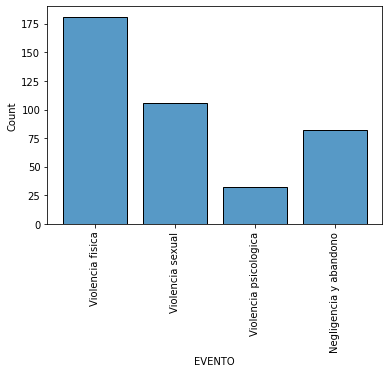

In [212]:
plt.xticks(rotation='vertical')
histplot_event = sns.histplot(data=df_final['EVENTO'], shrink=0.8);
## histplot_event.set_xticklabels(histplot_event.get_xticklabels(),rotation = 45);

In [213]:
def apply_func_evento(myDf):
  return pd.Series({
       'F': myDf[myDf['GENERO'] == 'F']['GENERO'].count(),
       'M': myDf[myDf['GENERO'] == 'M']['GENERO'].count(),
       'TOTAL': myDf.shape[0]
   })
  
df_final.groupby('EVENTO').apply(apply_func_evento)

,F,M,TOTAL
EVENTO,,,
Negligencia y abandono,41,41,82
Violencia fisica,150,31,181
Violencia psicologica,23,9,32
Violencia sexual,87,19,106


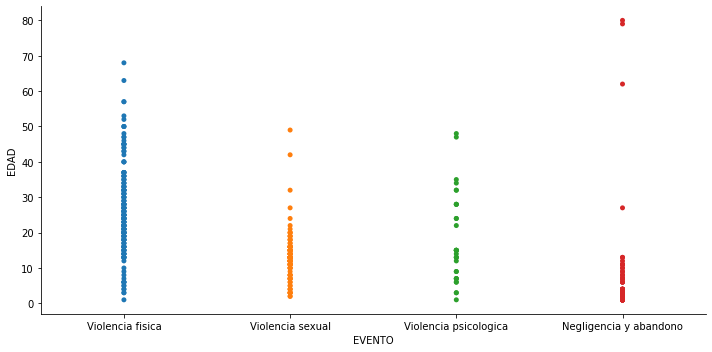

In [214]:
sns.catplot(x="EVENTO", y="EDAD", jitter=False, data=df_final, aspect=2)

In [215]:
def apply_func_genero(myDf):
  return pd.Series({
       'Nya': myDf[myDf['EVENTO'] == 'Negligencia y abandono']['EVENTO'].count(),
       'Vf': myDf[myDf['EVENTO'] == 'Violencia fisica']['EVENTO'].count(),
       'Vp': myDf[myDf['EVENTO'] == 'Violencia psicologica']['EVENTO'].count(),
       'Vs': myDf[myDf['EVENTO'] == 'Violencia sexual']['EVENTO'].count(),
   })
  
## El dataFrame resultante de esta operación nos servirá para el análisis de Covarianza y correlación
df_multi = df_final.groupby('GENERO').apply(apply_func_genero)
df_multi

,Nya,Vf,Vp,Vs
GENERO,,,,
F,41,150,23,87
M,41,31,9,19


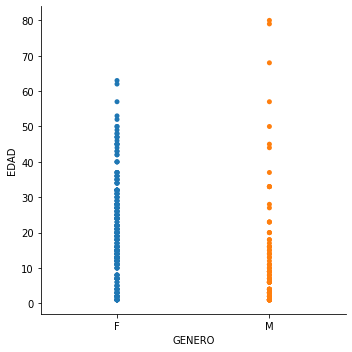

In [216]:
sns.catplot(x="GENERO", y="EDAD", jitter=False, data=df_final)

## **5. Entendimiento de los datos**
---

### Estadística descriptiva
**Edad media**

In [217]:
df_final['EDAD'].mean()

## con intervalos de confianza


18.054862842892767

**Edad mediana**

In [218]:
df_final['EDAD'].median()

15.0

**Moda de edad y evento**

In [219]:
df_final[['EDAD', 'EVENTO']].mode()

,EDAD,EVENTO
0,1.0,Violencia fisica
1,13.0,NaN


### Medidas de dispersión


**Desviación estándar**

In [220]:
df_final['EDAD'].std()

13.858101693364826

**Rango máximo y mínimo**

In [221]:
df_final['EDAD'].max()

80.0

In [222]:
df_final['EDAD'].min()

1.0

Rango por evento / género

In [223]:
def apply_func_range(myDf):
  return pd.Series({
      'F - Edad Max': myDf[myDf['GENERO'] == 'F']['EDAD'].max(),
      'F - Edad Min': myDf[myDf['GENERO'] == 'F']['EDAD'].min(),
      'M - Edad Max': myDf[myDf['GENERO'] == 'M']['EDAD'].max(),
      'M - Edad Min': myDf[myDf['GENERO'] == 'M']['EDAD'].min(),
})

df_final.groupby('EVENTO').apply(apply_func_range)

,F - Edad Max,F - Edad Min,M - Edad Max,M - Edad Min
EVENTO,,,,
Negligencia y abandono,62.0,1.0,80.0,1.0
Violencia fisica,63.0,1.0,68.0,4.0
Violencia psicologica,48.0,7.0,9.0,1.0
Violencia sexual,49.0,2.0,27.0,3.0


## **6. Análisis de correlación**
---

### *Correlación entre Edad y Género (Correlation between a continuous and categorical variable)*
> The point biserial correlation is used to measure the relationship between a binary variable, x, and a continuous variable, y. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply a determinative relationship.

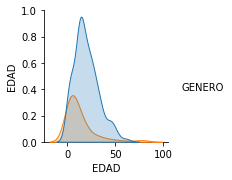

In [224]:
sns.pairplot(df_final, hue = 'GENERO', vars=['EDAD']);

In [226]:
matrix_corr_age_genre = df_final.loc[:, ['EDAD', 'GENERO']]
matrix_corr_age_genre['IS_FEMENINE'] = matrix_corr_age_genre['GENERO'].apply(lambda x: 1 if x == 'F' else 0)
matrix_corr_age_genre['IS_MASCULINE'] = matrix_corr_age_genre['GENERO'].apply(lambda x: 1 if x == 'M' else 0)

matrix_corr_age_genre

,EDAD,GENERO,IS_FEMENINE,IS_MASCULINE
0,34.0,F,1,0
2,22.0,F,1,0
3,16.0,M,0,1
4,3.0,F,1,0
5,9.0,M,0,1
...,...,...,...,...
414,4.0,M,0,1
415,3.0,M,0,1
416,24.0,F,1,0
417,32.0,F,1,0


In [243]:
def correlacion_pointbiserialr_con_significancia(x, y, alpha=0.05):
  coef, p = stats.pointbiserialr(x, y)
  print(f'Coeficiente de correlación de Biserial r: {coef:.2f}')
  if p > alpha:
    print(f'Las muestras no están correlacionadas (p = {p:.8f})')
  else:
    print(f'Las muestras están correlacionadas (p = {p:.8f})')

In [242]:
correlacion_pointbiserialr_con_significancia(matrix_corr_age_genre['IS_FEMENINE'], matrix_corr_age_genre['EDAD'])

Coeficiente de correlación de Biserial r: 0.21
Las muestras están correlacionadas (p = 0.00002900)


In [240]:
correlacion_pointbiserialr_con_significancia(matrix_corr_age_genre['IS_MASCULINE'], matrix_corr_age_genre['EDAD'])

Coeficiente de correlación de Biserial r: -0.21
Las muestras están correlacionadas (p = 0.00002900)


### *Correlación entre tipo de evento y género (Correlation between two nominal variables)*

`scipy.stats.contingency.association` Calculates degree of association between two nominal variables.

> Meaning of association: V defines a perfect relationship as one which is predictive or ordered monotonic, and defines a null relationship as statistical independence, as discussed in the section on association. However, the more unequal the marginals, the more V will be less than 1.0. [Nominal Association: Phi and Cramer's V](http://www.people.vcu.edu/~pdattalo/702SuppRead/MeasAssoc/NominalAssoc.html)


In [230]:
## Usaremos nuevamente la matriz generada de Evento / Género
matrix_corr_genre_event = df_multi
matrix_corr_genre_event

,Nya,Vf,Vp,Vs
GENERO,,,,
F,41,150,23,87
M,41,31,9,19


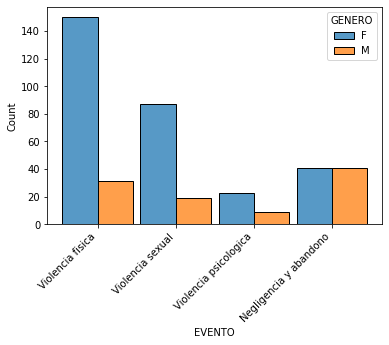

In [231]:

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'  
);

hist_event_by_sex = sns.histplot(data=df_final, x="EVENTO", shrink=0.9, hue="GENERO", multiple="dodge",)
##hist_event_by_sex.set_xticklabels(hist_event_by_sex.get_xticklabels(),rotation = 45);


In [232]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [244]:
correlation_genre_event = cramers_v(df_final['EVENTO'], df_final['GENERO'])
correlation_genre_event
                                    

0.28881671443284673

## **CONCLUSIONES**
---




> Existe correlación entre Edad y género, evento y género

El p-valor para un test de hipótesis cuya hipótesis nula es que los datos no están correlacionados. Por lo tanto, si el p-valor <α (nivel de significancia), esto quiere decir que la correlación es significativa. De lo contrario, la correlación puede deberse a la aleatoriedad de los datos, independientemente de su valor.






## Enlaces de interés
--------

*   [Eventos de violencia de género en Villavicencio](https://https://www.datos.gov.co/Salud-y-Protecci-n-Social/Evento-de-Violencia-de-G-nero-en-el-Municipio-de-V/ujc8-anbn), datos abiertos de la Empresa Social del Estado de Villavicencio
*   [Plan de desarrollo. Villavicencio cambia contigo](http://historico.villavicencio.gov.co/MiMunicipio/ProgramadeGobierno/Plan%20de%20Desarrollo%20Villavicencio%20Cambia%20Contigo%202020%20-%202023.pdf)

